<a href="https://colab.research.google.com/github/alanmejiaa/Procesamiento-y-Clasificacion-de-Datos-2024/blob/main/Tarea%20%231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tarea #1

### Analisis de Texto

#### Requisitos

Realizar un análisis estadístico sobre algún origen de datos textual (libros, publicaciones en redes sociales, entradas de blog, discursos políticos...) sobre dos o más fuentes de uno o más autores.

Analizar estadística descriptiva básica, frecuencias, distribuciones de palabras, n-gramas, uso de signos de puntuación, emojis...

Comparar las diversas fuentes y aventurar conclusiones a partir de los hallazgos en un reporte científico (de preferencia hecho en Latex).

Sube a tu repositorio el código utilizado en tu tarea y el reporte en PDF en una carpeta claramente identificada.

#### Calificación

Se califica con 10 puntos quien cumple con los requisitos.

### Introducción a Miguel de Cervantes y Sus Obras

**Miguel de Cervantes Saavedra (1547-1616)** es uno de los escritores más destacados de la literatura española y universal. Nacido en Alcalá de Henares, España, su vida estuvo marcada por múltiples experiencias, desde soldado en la Batalla de Lepanto hasta cautivo en Argel, lo que enriqueció su visión del mundo y se reflejó en su obra literaria.

Cervantes es conocido principalmente por su magistral obra **"Don Quijote de la Mancha"**, considerada la primera novela moderna y una de las mejores obras de ficción jamás escritas. Su narrativa innovadora, caracterización profunda y reflexiones sobre la locura y la realidad han dejado una huella indeleble en la literatura.

#### **Don Quijote de la Mancha**

Publicada en dos partes (1605 y 1615), "Don Quijote de la Mancha" narra las aventuras de Alonso Quijano, un hidalgo que, enloquecido por la lectura de novelas de caballería, decide convertirse en el caballero andante Don Quijote. Acompañado por su fiel escudero, Sancho Panza, Don Quijote se embarca en múltiples aventuras, confundiendo la realidad con sus fantasías caballerescas. La obra es una sátira de las novelas de caballería y un profundo estudio del idealismo frente al pragmatismo.

#### **Los Entremeses**

"Los Entremeses" son una colección de breves piezas teatrales escritas por Cervantes, publicadas en 1615. Estas obras cortas, destinadas a ser representadas entre los actos de las comedias, muestran el ingenio y la agudeza del autor para retratar situaciones cotidianas con humor y crítica social. Algunas de las piezas más conocidas incluyen "El retablo de las maravillas" y "La cueva de Salamanca".

#### **Novelas Ejemplares**

Publicadas en 1613, las "Novelas Ejemplares" son una colección de doce relatos cortos. Cada novela presenta una historia independiente con temas variados que van desde el amor y el honor hasta la picaresca y la crítica social. Entre las más famosas se encuentran "La gitanilla" y "Rinconete y Cortadillo". Estas obras destacan por su diversidad temática y la riqueza de sus personajes, ofreciendo una visión panorámica de la sociedad española del Siglo de Oro.

### Objetivo del Análisis

El presente estudio se enfoca en un análisis estadístico de los textos "Don Quijote", "Los entremeses" y "Novelas ejemplares" de Miguel de Cervantes. Se emplearán técnicas de procesamiento de lenguaje natural (PLN) para investigar métricas descriptivas, frecuencias de palabras, n-gramas y uso de signos de puntuación, con el fin de comparar y contrastar los estilos y temáticas presentes en estas obras.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
import requests

In [15]:
#URL libros
url_quijote = 'https://www.gutenberg.org/cache/epub/2000/pg2000.txt' #Don Quijote
url_entremeses = 'https://www.gutenberg.org/cache/epub/57955/pg57955.txt' #Los entremeses
url_novelas = 'https://www.gutenberg.org/cache/epub/61202/pg61202.txt' #Novelas ejemplares

In [16]:
#Descargar libros
responses_quijote = requests.get(url_quijote)
text_quijote = responses_quijote.text

responses_entremeses = requests.get(url_entremeses)
text_entremeses = responses_entremeses.text

responses_novelas = requests.get(url_novelas)
text_novelas = responses_novelas.text

In [17]:
# Guardar los textos en archivos
with open('don_quijote.txt', 'w', encoding='utf-8') as file:
    file.write(text_quijote)

with open('los_entremeses.txt', 'w', encoding='utf-8') as file:
    file.write(text_entremeses)

with open('novelas_ejemplares.txt', 'w', encoding='utf-8') as file:
    file.write(text_novelas)

In [18]:
# Cargar los textos desde los archivos
with open('don_quijote.txt', 'r', encoding='utf-8') as file:
    text_quijote = file.read()

with open('los_entremeses.txt', 'r', encoding='utf-8') as file:
    text_entremeses = file.read()

with open('novelas_ejemplares.txt', 'r', encoding='utf-8') as file:
    text_novelas = file.read()

In [19]:
#Creamos nuevas lineas
list_quijote = text_quijote.split("\n")
list_entremeses = text_entremeses.split("\n")
list_novelas = text_novelas.split("\n")

In [22]:
# Imprimir las primeras 10 líneas de "Don Quijote"
primeras_10_lineas = list_quijote[:10]
print("\n".join(primeras_10_lineas))

﻿The Project Gutenberg eBook of Don Quijote
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.



In [23]:
# Imprimir las primeras 10 líneas de "Los entremeses"
primeras_10_lineas = list_entremeses[:10]
print("\n".join(primeras_10_lineas))

﻿The Project Gutenberg eBook of Los entremeses
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.



In [24]:
# Imprimir las primeras 10 líneas de "Novelas ejemplares"
primeras_10_lineas = list_novelas[:10]
print("\n".join(primeras_10_lineas))

﻿The Project Gutenberg eBook of Novelas ejemplares
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.



Comprobamos que los libros se guardaron de forma correcta

Iniciaremos con el procesamiento y limpieza de datos:


In [48]:
#Creamos un conjunto de palabras no deseadas
unwanted_words = set(['y', 'el', 'como','solo','tan','si','project','ebook','gutenberg'])

In [49]:
# Función para limpiar y preprocesar texto
def preprocess_text(text):
    # Eliminar signos de puntuación y convertir a minúsculas
    texto_limpio = re.sub(r'[^\w\s]', '', text.lower())
    # Eliminar stopwords y palabras no deseadas
    stop_words = set(stopwords.words('spanish'))
    tokens = word_tokenize(texto_limpio)
    texto_filtrado = [word for word in tokens if word not in stop_words and word not in unwanted_words]
    return texto_filtrado

In [50]:
# Limpiar y preprocesar los textos eliminando "Project" y "Gutenberg"
words_quijote = preprocess_text(text_quijote)
words_entremeses = preprocess_text(text_entremeses)
words_novelas = preprocess_text(text_novelas)

In [51]:
# Crear la frecuencia de palabras para cada libro
fdist_quijote = FreqDist(words_quijote)
fdist_entremeses = FreqDist(words_entremeses)
fdist_novelas = FreqDist(words_novelas)

In [52]:
# Convertir las frecuencias a DataFrames
df_quijote = pd.DataFrame(fdist_quijote.most_common(20), columns=['token', '#'])
df_entremeses = pd.DataFrame(fdist_entremeses.most_common(20), columns=['token', '#'])
df_novelas = pd.DataFrame(fdist_novelas.most_common(20), columns=['token', '#'])

In [53]:
df_quijote.head(5)

,token,#
0,don,2718
1,quijote,2245
2,sancho,2174
3,dijo,1808
4,señor,1065


In [54]:
df_entremeses.head(5)

,token,#
0,á,775
1,mas,227
2,the,191
3,cristina,182
4,pues,176


In [56]:
df_novelas.head(5)

,token,#
0,á,5230
1,mas,1090
2,habia,768
3,dijo,751
4,ser,532


In [57]:
map_quijote = list(map(preprocess_text, words_quijote))
map_entremeses = list(map(preprocess_text, words_entremeses))
map_novelas = list(map(preprocess_text, words_novelas))

In [58]:
words_quijote[:5]

['the', 'of', 'don', 'quijote', 'this']

# **Representación gráfica**

<ipython-input-60-237b929ff4e9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Palabra', y='Frecuencia', data=df, palette='viridis')


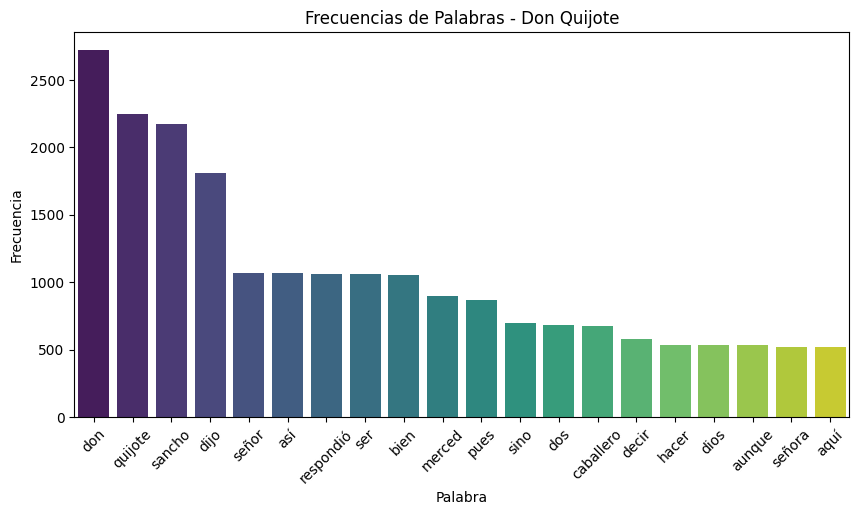

<ipython-input-60-237b929ff4e9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Palabra', y='Frecuencia', data=df, palette='viridis')


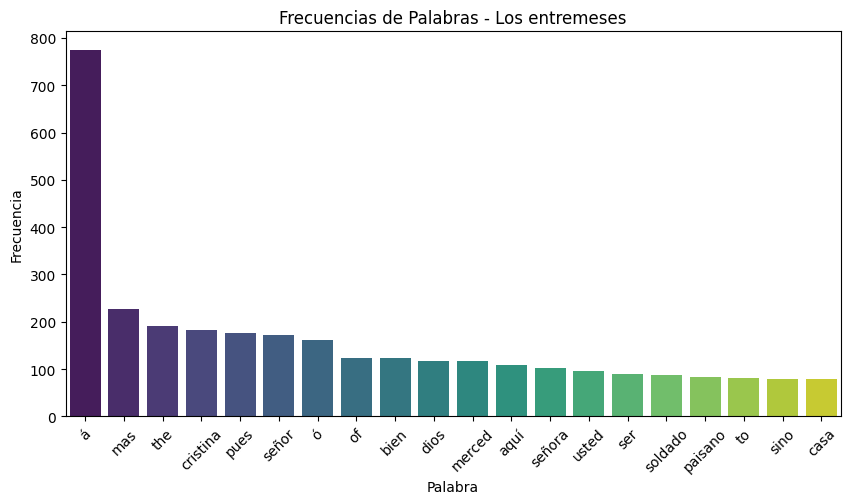

<ipython-input-60-237b929ff4e9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Palabra', y='Frecuencia', data=df, palette='viridis')


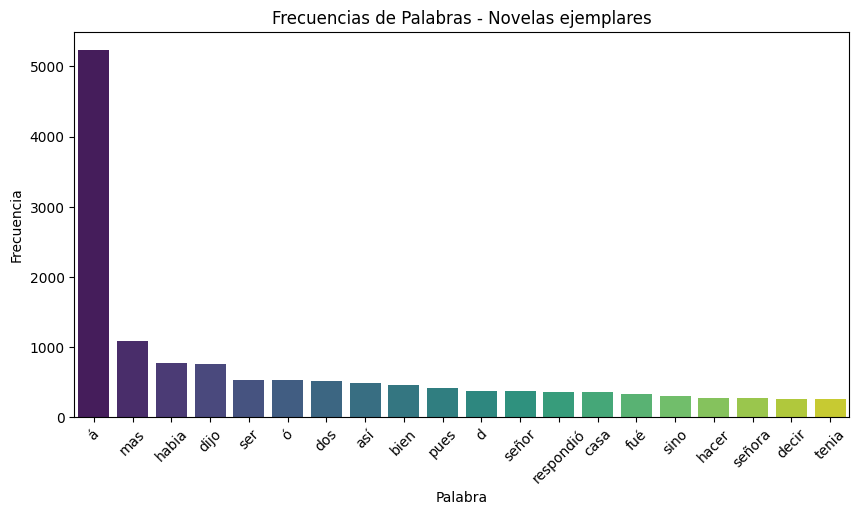

In [60]:

# Función para graficar las frecuencias de palabras
def plot_frequencies(fdist, title):
    df = pd.DataFrame(fdist.most_common(20), columns=['Palabra', 'Frecuencia'])
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Palabra', y='Frecuencia', data=df, palette='viridis')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Graficar las frecuencias de palabras para cada libro
plot_frequencies(fdist_quijote, 'Frecuencias de Palabras - Don Quijote')
plot_frequencies(fdist_entremeses, 'Frecuencias de Palabras - Los entremeses')
plot_frequencies(fdist_novelas, 'Frecuencias de Palabras - Novelas ejemplares')

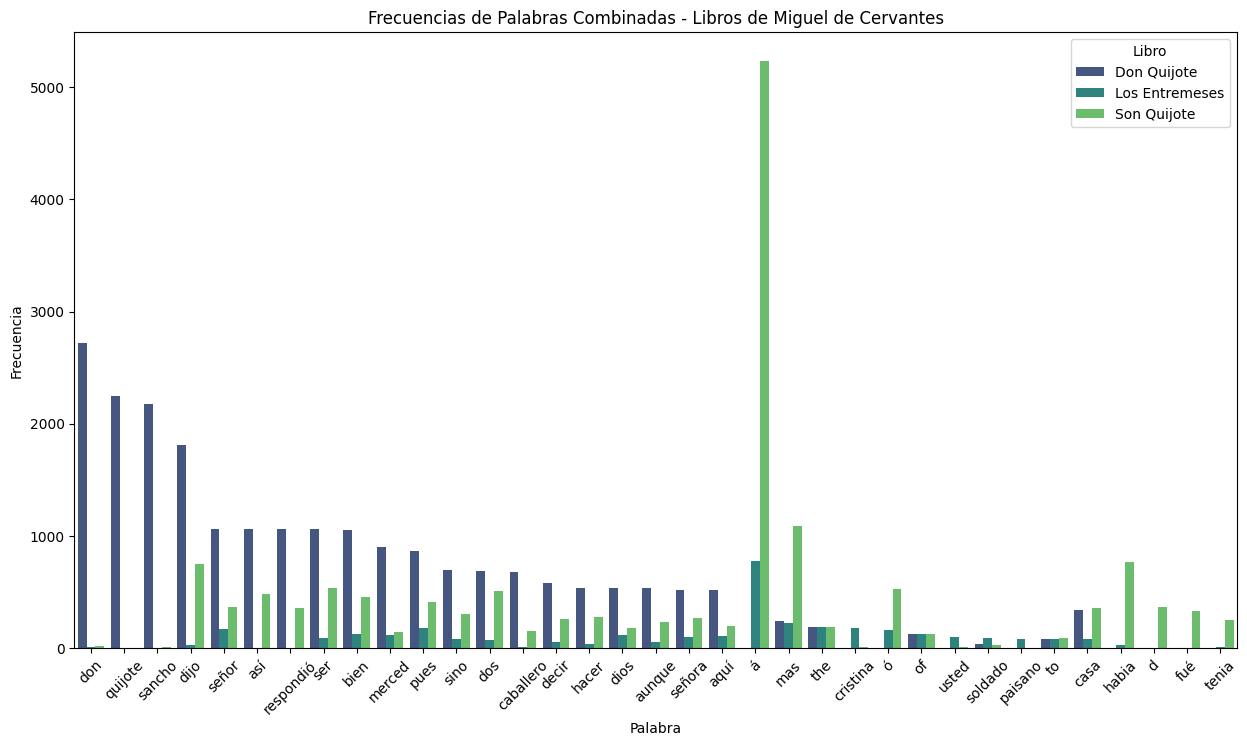

In [61]:
#palabras más comunes sin duplicados
def get_unique_words(fdist, existing_words):
    common_words = [word for word, freq in fdist.most_common(20) if word not in existing_words]
    return common_words

#palabras únicas
unique_words = []
unique_words += get_unique_words(fdist_quijote, unique_words)
unique_words += get_unique_words(fdist_entremeses, unique_words)
unique_words += get_unique_words(fdist_novelas, unique_words)
# crear un df para la gráfica combinada
data_combined = []
for word in unique_words:
    if word in fdist_quijote:
        data_combined.append((word, fdist_quijote[word], 'Don Quijote'))
    if word in fdist_entremeses:
        data_combined.append((word, fdist_entremeses[word], 'Los Entremeses'))
    if word in fdist_novelas:
        data_combined.append((word, fdist_novelas[word], 'Son Quijote'))

df_combined = pd.DataFrame(data_combined, columns=['Palabra', 'Frecuencia', 'Libro'])
# Graficar la frecuencia combinada
plt.figure(figsize=(15, 8))
sns.barplot(x='Palabra', y='Frecuencia', hue='Libro', data=df_combined, palette='viridis')
plt.title('Frecuencias de Palabras Combinadas - Libros de Miguel de Cervantes')
plt.xticks(rotation=45)
plt.show()

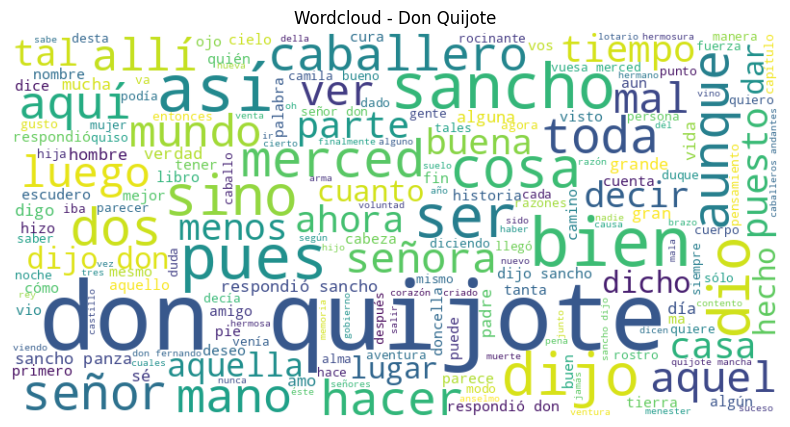

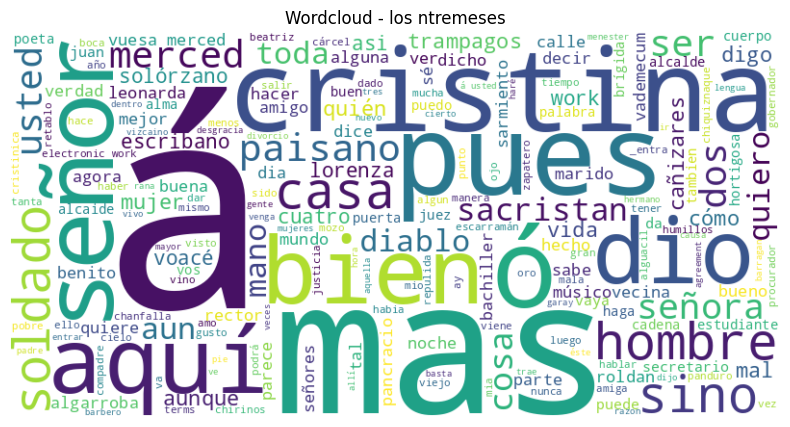

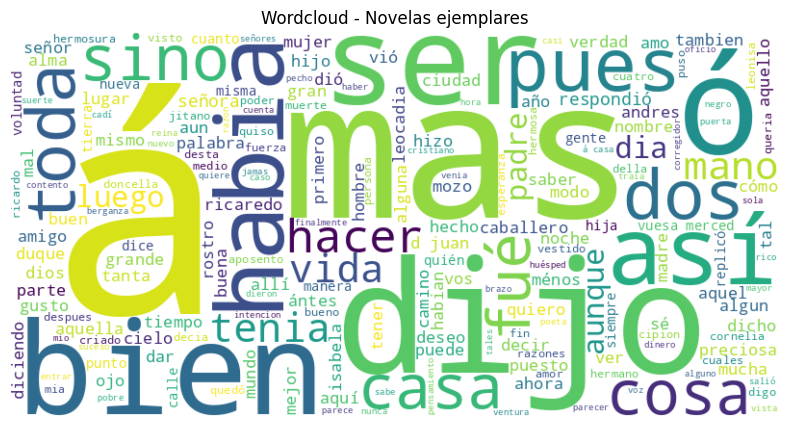

In [62]:
# Función para crear y mostrar wordcloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Crear y mostrar
create_wordcloud(' '.join(words_quijote), 'Wordcloud - Don Quijote')
create_wordcloud(' '.join(words_entremeses), 'Wordcloud - los ntremeses')
create_wordcloud(' '.join(words_novelas), 'Wordcloud - Novelas ejemplares')

In [68]:
from nltk.util import ngrams
from collections import Counter

# Función para obtener n-grams
def get_ngrams(words, n):
    n_grams = ngrams(words, n)
    return Counter(n_grams)

# Obtener bigrams
bigrams_quijote = get_ngrams(words_quijote, 2)
bigrams_entremeses = get_ngrams(words_entremeses, 2)
bigrams_novelas = get_ngrams(words_novelas, 2)

# Imprimir los bigrams más comunes
print("Bigrams 'Don Quijote':", bigrams_quijote.most_common(5))
print("Bigrams 'Los entremeses':", bigrams_entremeses.most_common(5))
print("Bigrams 'Novelas':", bigrams_novelas.most_common(10))

Bigrams 'Don Quijote': [(('don', 'quijote'), 2236), (('dijo', 'don'), 312), (('respondió', 'sancho'), 305), (('sancho', 'panza'), 299), (('respondió', 'don'), 270)]
Bigrams 'Los entremeses': [(('vuesa', 'merced'), 40), (('of', 'the'), 34), (('in', 'the'), 18), (('terms', 'of'), 18), (('á', 'dios'), 18)]
Bigrams 'Novelas': [(('d', 'juan'), 155), (('vuesa', 'merced'), 103), (('dijo', 'á'), 67), (('á', 'casa'), 67), (('d', 'rafael'), 65), (('marco', 'antonio'), 64), (('á', 'dos'), 63), (('d', 'antonio'), 54), (('á', 'isabela'), 53), (('allí', 'á'), 52)]
